## 1. Load Sentinel-1 data through the datacube API  <a name="load"></a>

Area of interest is Lake George, an endorheic lake in south-eastern New South Wales, Australia.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import datacube

In [2]:
dc = datacube.Datacube(config='radar.conf')

In [3]:
# Define area and time period of interest
# area to check valid_area indexing
query = {
'y': (-31.2, -31.), 
'x': (147, 147.2),
'time':('2018-12-10','2019-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}
query_2 = {
'y': (-3473437.5, -3386337.5),
'x': (1569237.5, 1324662.5),
'time':('2018-12-01','2019-01-01'),
'crs': 'EPSG:3577',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

In [4]:
# Define area and time period of interest
# area to check valid_area indexing
query = {
'y': (-32.0, -31.7), 
'x': (148.45, 148.5),
'time':('2018-12-01','2019-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}
query_2 = {
'y': (-3600237.5, -3512012.5),
'x': (1720737.5, 1473312.5),
'time':('2018-12-01','2019-01-01'),
'crs': 'EPSG:3577',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}

In [5]:
radar_dss_6 = dc.find_datasets(product='s1_gamma0_scene_v5', group_by='solar_day', **query)
radar_6 = dc.load(product='s1_gamma0_scene_v5', datasets=radar_dss_6, **query_2)

In [8]:
radar_dss_7 = dc.find_datasets(product='s1_gamma0_scene_snap7', group_by='solar_day', **query)
radar_7 = dc.load(product='s1_gamma0_scene_snap7', datasets=radar_dss_7, **query_2)

In [9]:
im6 = 10* np.log10(radar_6.vh.groupby('time').apply(ndimage.uniform_filter, (7,7)))
im7 = 10* np.log10(radar_7.vh.groupby('time').apply(ndimage.uniform_filter, (7,7)))

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/computation.py:564: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/computation.py:564: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


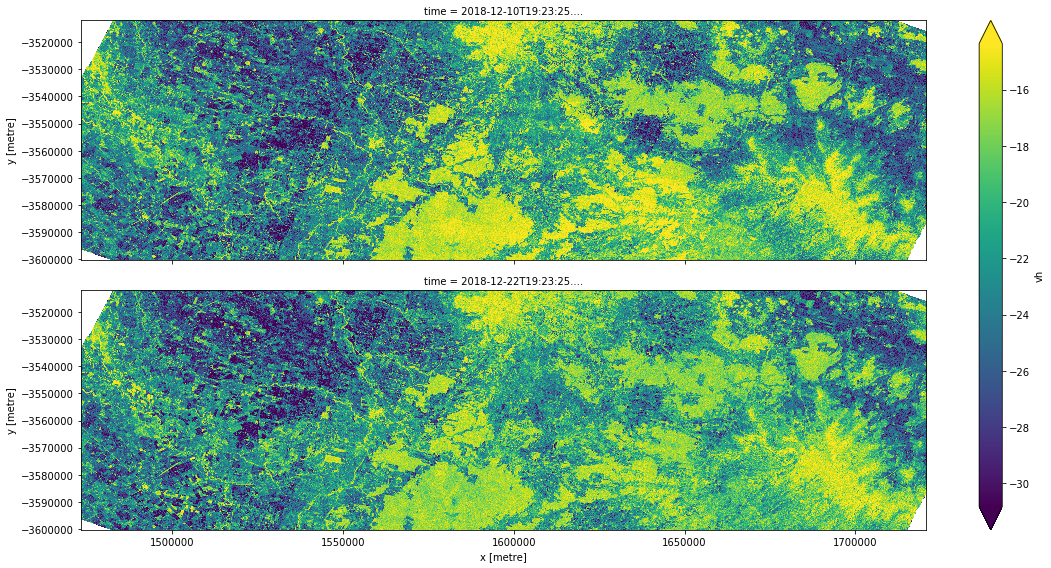

In [10]:
im6.plot.imshow(robust=True,figsize=(16,8), row='time');

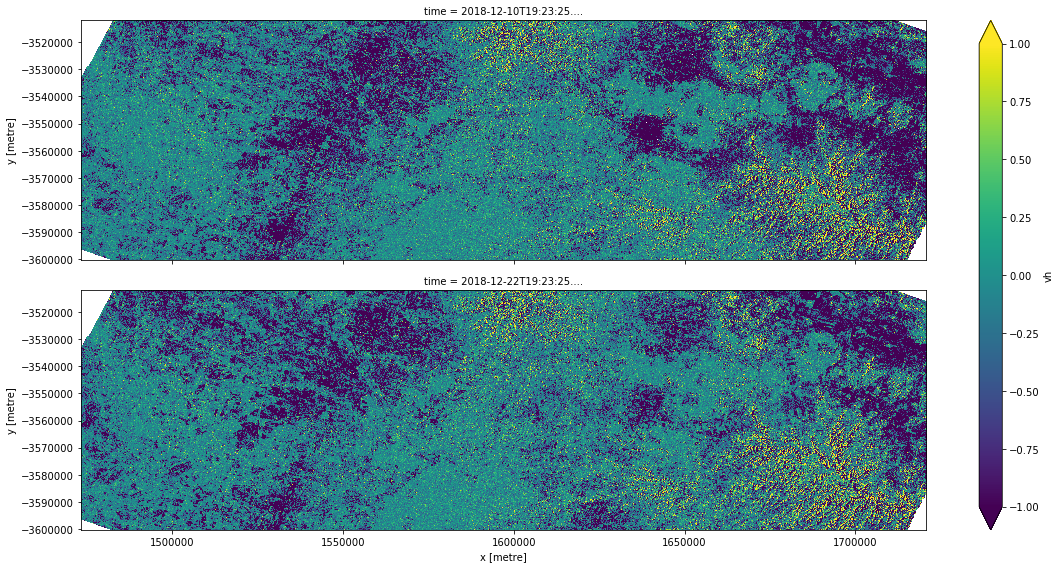

In [11]:
(im6-im7.values).plot.imshow(robust=True,vmin=-1, vmax=1,figsize=(16,8), row='time');

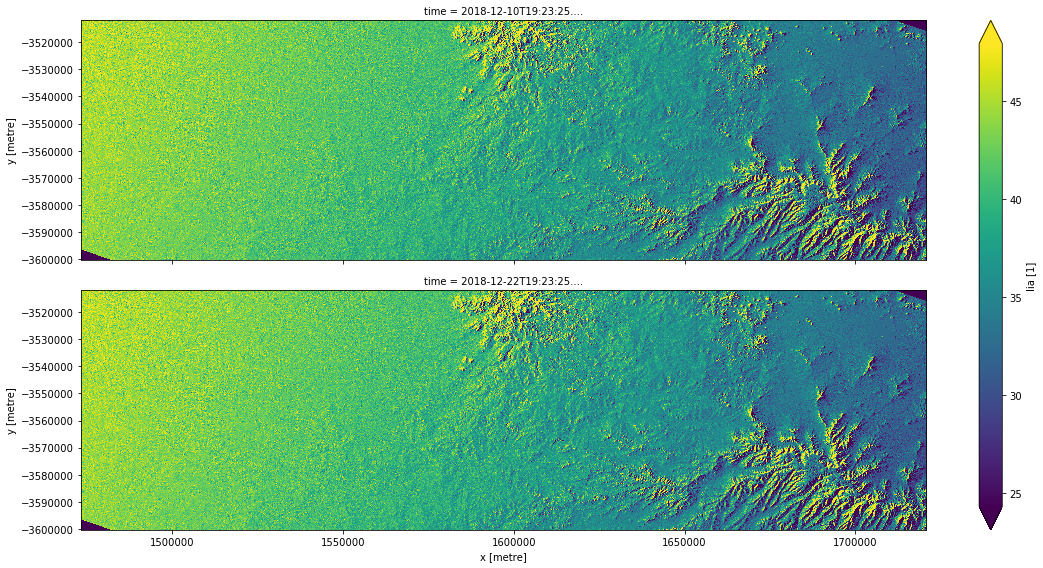

In [12]:
radar_6.lia.plot.imshow(robust=True,figsize=(16,8), row='time');

In [13]:
import seaborn as sns

arr_diff = (im7 - im6.values).values.ravel()
arr_vh =  im6.values.ravel()

arr_lia = radar_6.lia.values.ravel()
mask = ~np.isnan(arr_vh) & (arr_diff>-1) & (arr_diff<1) & (arr_lia>30) & (arr_lia<45) & (arr_vh>-30) & (arr_vh<-10)

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [14]:
arr_vh_7 =  im7.values.ravel()
mask = mask & (arr_vh_7>-30) & (arr_vh_7<-10)

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


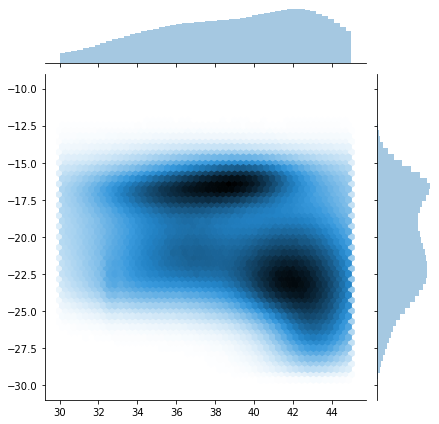

In [15]:
sns.jointplot(arr_lia[mask], arr_vh_7[mask], kind='hex')

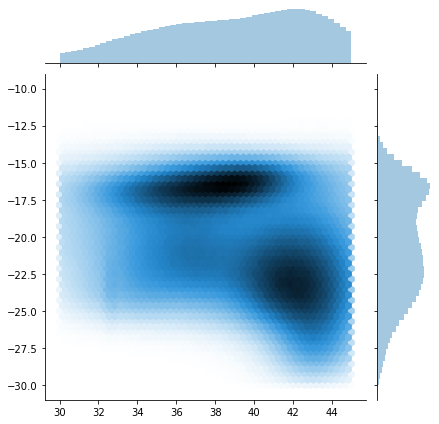

In [16]:
sns.jointplot(arr_lia[mask], arr_vh[mask], kind='hex')

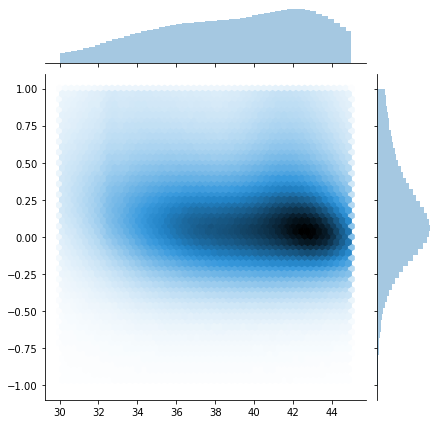

In [17]:
sns.jointplot(arr_lia[mask], arr_diff[mask], kind='hex')

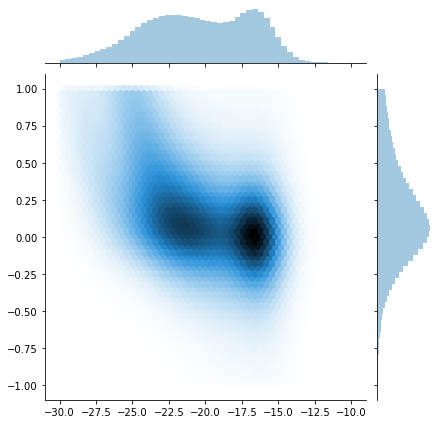

In [18]:
sns.jointplot(arr_vh[mask], arr_diff[mask], kind='hex')

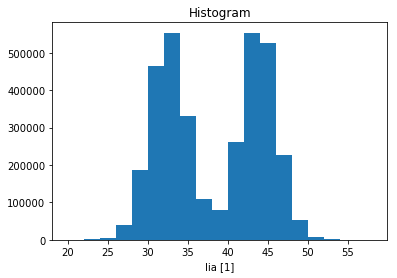

In [70]:
radar.lia.plot.hist(bins=np.arange(20,60,2));

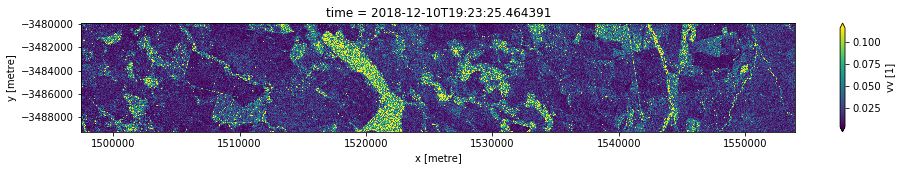

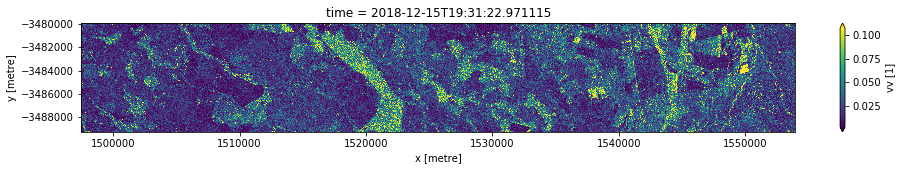

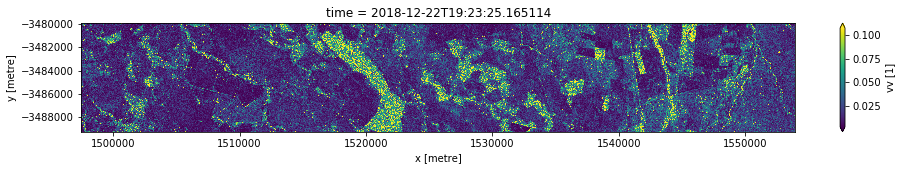

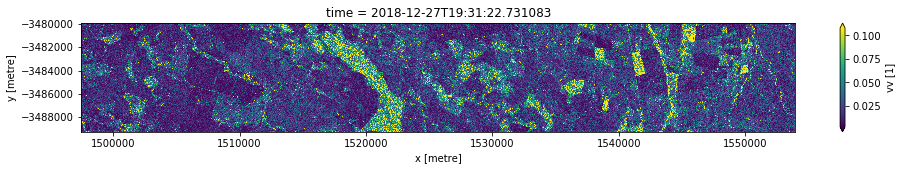

In [78]:
#vv.plot(col='time', col_wrap=3, robust=True);
for i in range(len(radar.time)):
    vv = radar.vv.isel(time=i).where(radar.vv.isel(time=i)>0)
    vv.plot(robust=True, figsize=(16,2))

In [72]:
query = {
'y': (-31.4, -31.2), 
'x': (147.7, 148.2),
'time':('2018-01-01','2019-01-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (25, -25)
}
prod_dc = datacube.Datacube()
gm = prod_dc.load(product='ls8_nbart_geomedian_annual',**query)
gm[['red','green','blue']].squeeze().to_array().plot.imshow(robust=True, figsize=(16,4));
vv.sel(x=gm.x,y=gm.y).plot(robust=True, figsize=(16,4), add_colorbar=False);

/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/g/data/v10/public/modules/dea-env/20190329/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


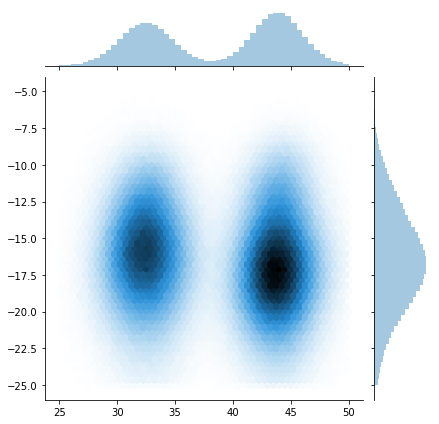

In [82]:
import seaborn as sns

arr_vv = 10*np.log10(radar.vv.values.ravel())
arr_vh = 10*np.log10(radar.vh.values.ravel())
arr_lia = radar.lia.values.ravel()
mask = ~np.isnan(arr_vv) & (arr_vv<-5) & (arr_vh<-10) & (arr_vv>-25) & (arr_vh>-35) & (arr_lia>25) & (arr_lia<50)

sns.jointplot(arr_lia[mask], arr_vv[mask], kind='hex')

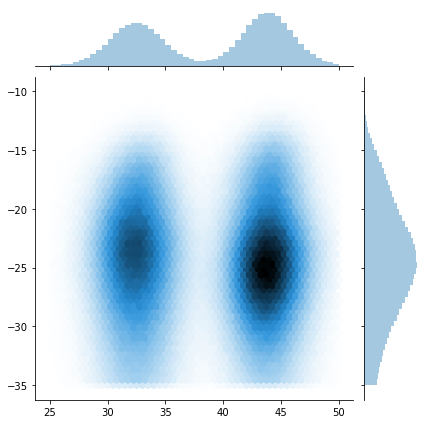

In [83]:
sns.jointplot(arr_lia[mask], arr_vh[mask], kind='hex')